In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style='whitegrid')
%matplotlib inline


df = sns.load_dataset('titanic')


In [2]:
print(df.shape)
print(df.columns)
print(df.dtypes)
df.head()


(891, 15)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.isnull().sum().sort_values(ascending=False)


,0
deck,688
age,177
embarked,2
embark_town,2
sex,0
pclass,0
survived,0
fare,0
parch,0
sibsp,0


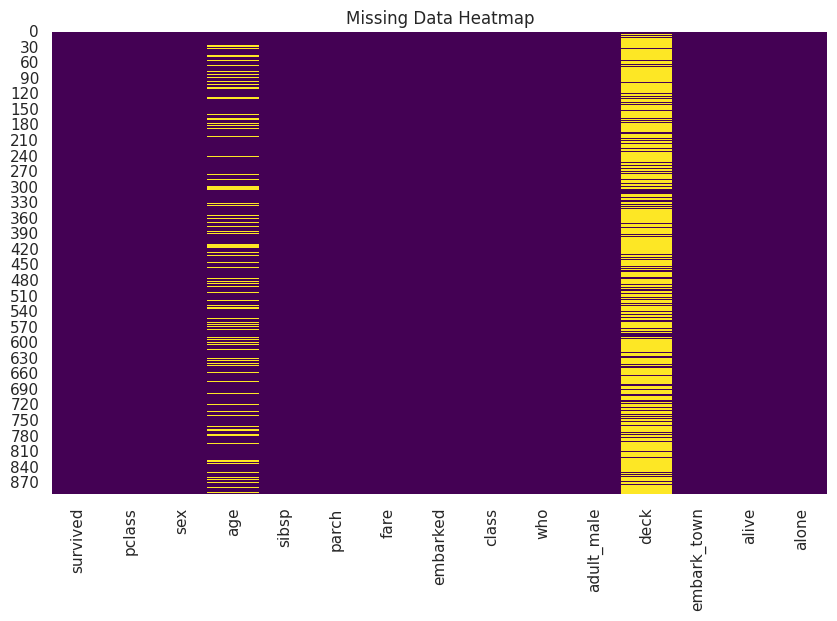

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()



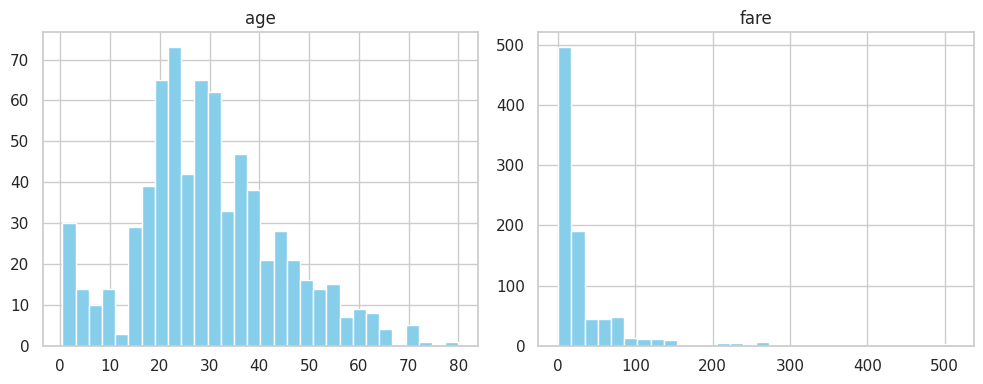

In [5]:
num_cols = ['age', 'fare']
df[num_cols].hist(bins=30, figsize=(10, 4), layout=(1, 2), color='skyblue')
plt.tight_layout()
plt.show()


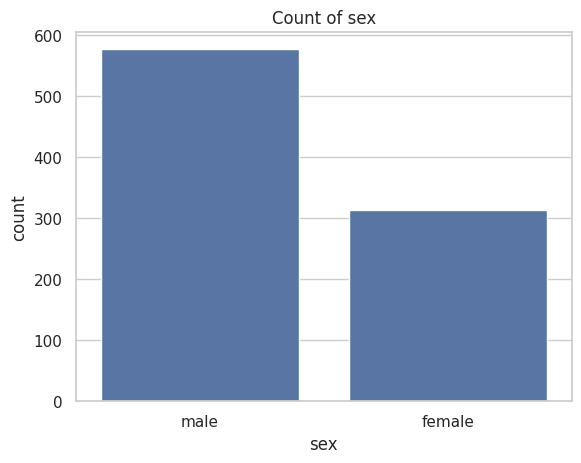

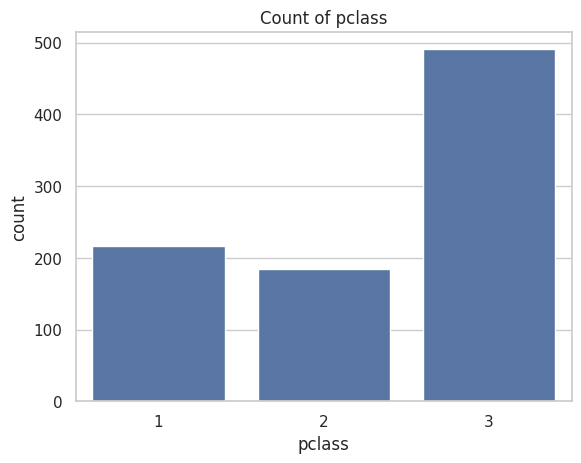

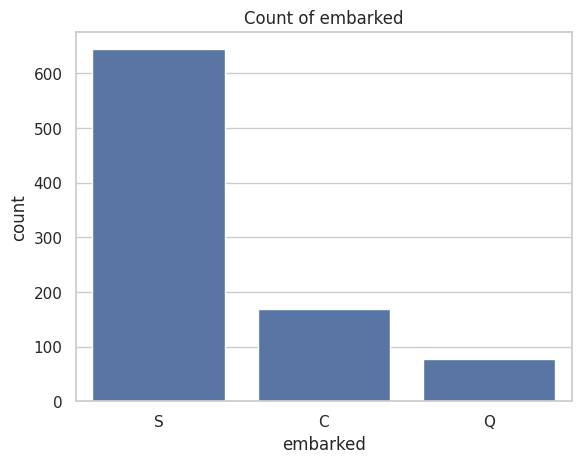

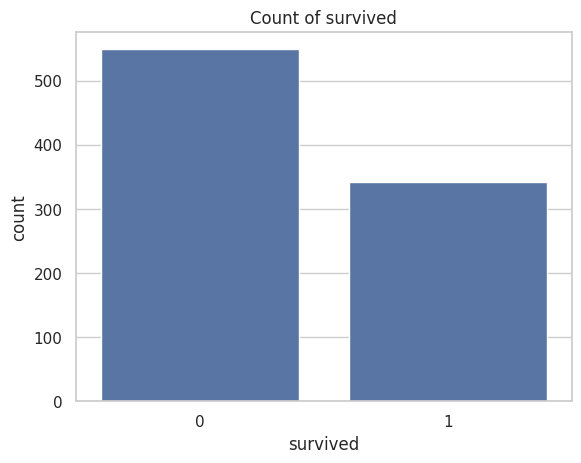

In [6]:
cat_cols = ['sex', 'pclass', 'embarked', 'survived']
for col in cat_cols:
    sns.countplot(data=df, x=col)
    plt.title(f"Count of {col}")
    plt.show()



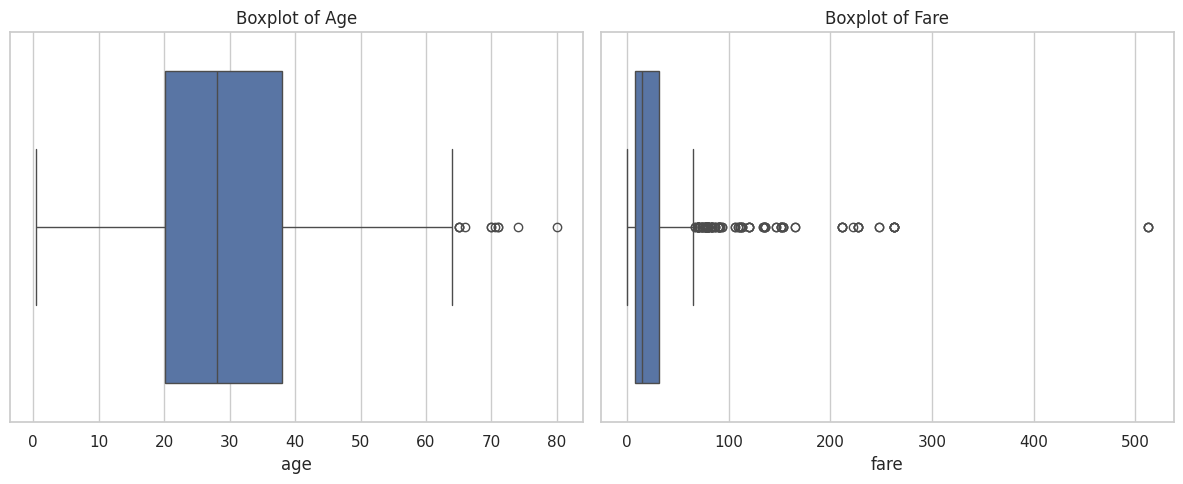

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['age'])
plt.title("Boxplot of Age")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['fare'])
plt.title("Boxplot of Fare")

plt.tight_layout()
plt.show()


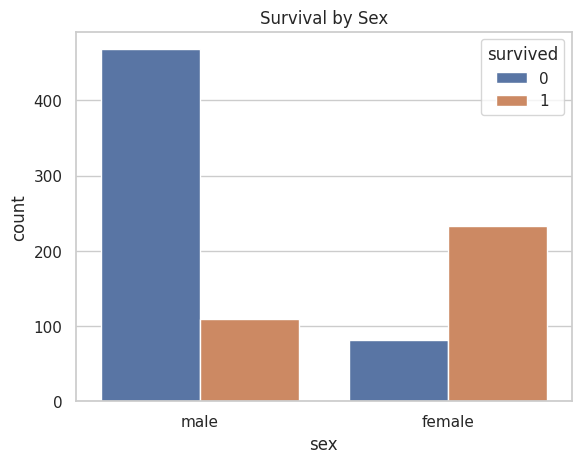

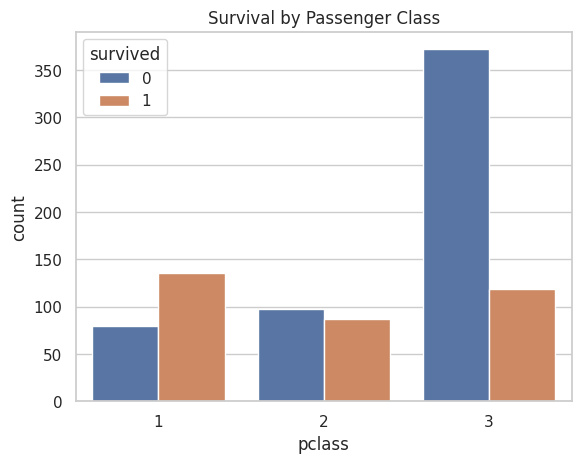

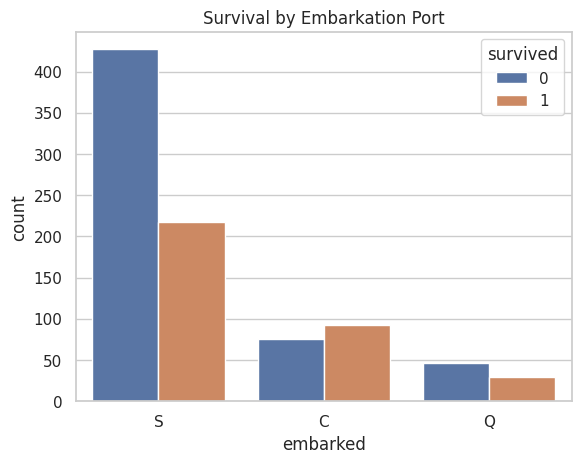

In [8]:
sns.countplot(data=df, x='sex', hue='survived')
plt.title("Survival by Sex")
plt.show()

sns.countplot(data=df, x='pclass', hue='survived')
plt.title("Survival by Passenger Class")
plt.show()

sns.countplot(data=df, x='embarked', hue='survived')
plt.title("Survival by Embarkation Port")
plt.show()


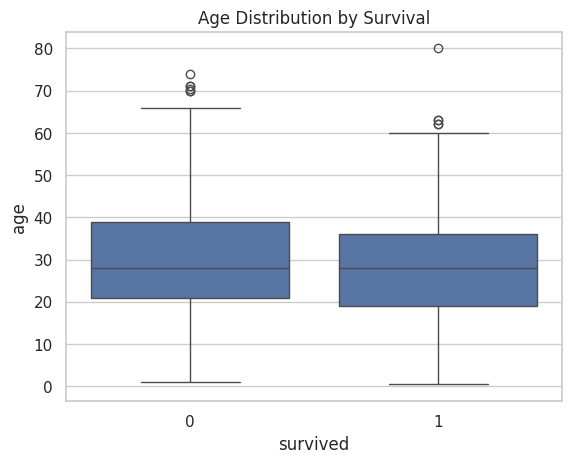

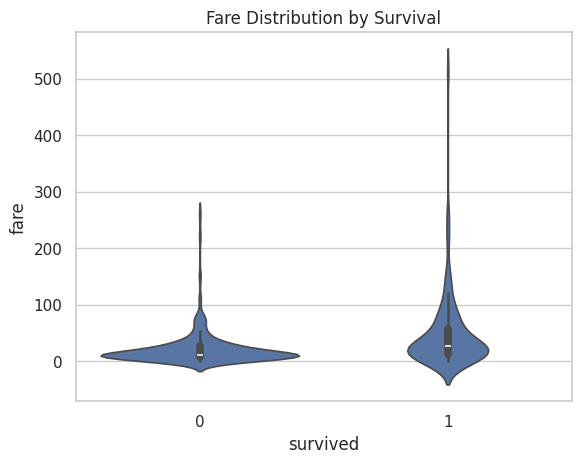

In [9]:
sns.boxplot(data=df, x='survived', y='age')
plt.title("Age Distribution by Survival")
plt.show()

sns.violinplot(data=df, x='survived', y='fare')
plt.title("Fare Distribution by Survival")
plt.show()


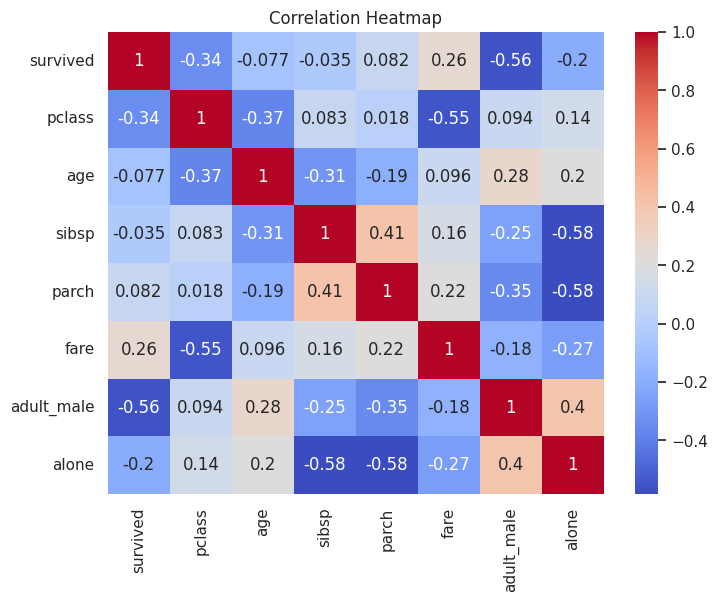

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


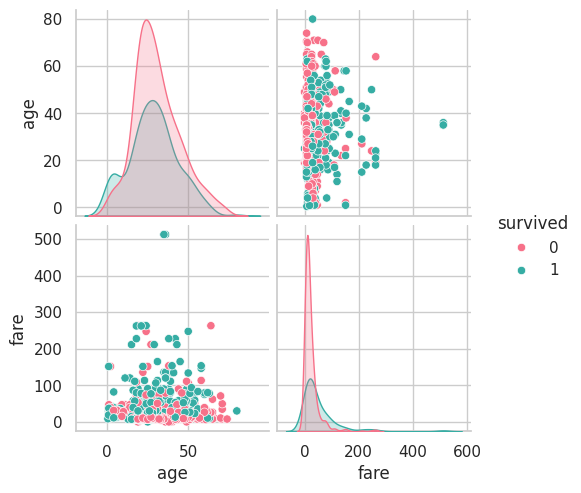

In [11]:
sns.pairplot(df.dropna(subset=['age', 'fare']),
             vars=['age', 'fare'],
             hue='survived',
             palette='husl')
